In [54]:
import pandas as pd 
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt 

In [36]:
data = pd.read_csv('~/Documents/csvs/ds_salaries.csv')
# Check to make sure data was loaded correctly.
data.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [37]:
# Drop unwanted columns.
data = data.drop(columns='Unnamed: 0')

## Summarizing Data

In [68]:
data.shape

(607, 11)

In [93]:
data.describe()

,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,6.070000e+02,607.000000,607.00000
mean,2021.405272,3.240001e+05,112297.869852,70.92257
std,0.692133,1.544357e+06,70957.259411,40.70913
min,2020.000000,4.000000e+03,2859.000000,0.00000
25%,2021.000000,7.000000e+04,62726.000000,50.00000
50%,2022.000000,1.150000e+05,101570.000000,100.00000
75%,2022.000000,1.650000e+05,150000.000000,100.00000
max,2022.000000,3.040000e+07,600000.000000,100.00000


In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           607 non-null    int64 
 1   experience_level    607 non-null    object
 2   employment_type     607 non-null    object
 3   job_title           607 non-null    object
 4   salary              607 non-null    int64 
 5   salary_currency     607 non-null    object
 6   salary_in_usd       607 non-null    int64 
 7   employee_residence  607 non-null    object
 8   remote_ratio        607 non-null    int64 
 9   company_location    607 non-null    object
 10  company_size        607 non-null    object
dtypes: int64(4), object(7)
memory usage: 52.3+ KB


In [69]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [39]:
# Check for any NA's in all columns. 
data.isna().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

## Explore the Data by Grouping the Data 

In [76]:
data.groupby(by='work_year').size().nlargest(10)

work_year
2022    318
2021    217
2020     72
dtype: int64

In [75]:
data.groupby(by='experience_level').size().nlargest(10)

experience_level
SE    280
MI    213
EN     88
EX     26
dtype: int64

In [77]:
data.groupby(by='employment_type').size().nlargest(10)

employment_type
FT    588
PT     10
CT      5
FL      4
dtype: int64

In [78]:
data.groupby(by='job_title').size().nlargest(10)

job_title
Data Scientist                143
Data Engineer                 132
Data Analyst                   97
Machine Learning Engineer      41
Research Scientist             16
Data Science Manager           12
Data Architect                 11
Big Data Engineer               8
Machine Learning Scientist      8
AI Scientist                    7
dtype: int64

In [82]:
data.groupby(by='salary_currency').size().nlargest(10)

salary_currency
USD    398
EUR     95
GBP     44
INR     27
CAD     18
JPY      3
PLN      3
TRY      3
AUD      2
BRL      2
dtype: int64

In [41]:
data.groupby(by='employee_residence').size().nlargest(10)

employee_residence
US    332
GB     44
IN     30
CA     29
DE     25
FR     18
ES     15
GR     13
JP      7
BR      6
dtype: int64

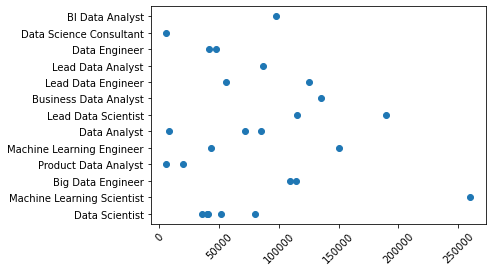

In [109]:

y = data['job_title'].head(25)
x = data['salary_in_usd'].head(25)
fig = plt.figure()
plt.scatter(x, y)
plt.xticks(rotation = 45)
plt.show()

In [85]:
data['job_title'].head(10)

0                Data Scientist
1    Machine Learning Scientist
2             Big Data Engineer
3          Product Data Analyst
4     Machine Learning Engineer
5                  Data Analyst
6           Lead Data Scientist
7                Data Scientist
8         Business Data Analyst
9            Lead Data Engineer
Name: job_title, dtype: object

In [46]:
data.groupby(by=['job_title', 'salary_in_usd']).size().nlargest(25)

job_title                  salary_in_usd
Data Scientist             140000           6
Data Analyst               90320            5
Data Scientist             100000           5
Data Analyst               80000            4
                           112900           4
                           135000           4
Data Engineer              78526            4
Data Scientist             210000           4
Data Analyst               130000           3
                           170000           3
Data Engineer              100000           3
                           115000           3
                           132320           3
                           150000           3
                           160000           3
                           200000           3
Data Scientist             120000           3
                           123000           3
                           130000           3
                           140400           3
                           150000      